**Movie Recommendation System**

Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import datetime

In [2]:
df=pd.read_csv('/content/Movie-Dataset-Latest.csv')
df.head()

,Unnamed: 0,id,title,release_date,overview,popularity,vote_average,vote_count,video
0,0,19404,Dilwale Dulhania Le Jayenge,1995-10-20,"Raj is a rich, carefree, happy-go-lucky second...",25.884,8.7,3304,False
1,1,278,The Shawshank Redemption,1994-09-23,Framed in the 1940s for the double murder of h...,60.110,8.7,20369,False
2,2,238,The Godfather,1972-03-14,"Spanning the years 1945 to 1955, a chronicle o...",62.784,8.7,15219,False
3,3,724089,Gabriel's Inferno Part II,2020-07-31,Professor Gabriel Emerson finally learns the t...,28.316,8.6,1360,False
4,4,424,Schindler's List,1993-11-30,The true story of how businessman Oskar Schind...,38.661,8.6,12158,False


Data Preprocessing

In [3]:
df['release_date']=pd.to_datetime(df['release_date'],format='%Y-%m-%d')

In [4]:
df['year']=df['release_date'].dt.year
df['month']=df['release_date'].dt.month

In [5]:
df1=df.drop(['Unnamed: 0','id','release_date','overview','video','year','month'],axis=1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9463 entries, 0 to 9462
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Unnamed: 0    9463 non-null   int64         
 1   id            9463 non-null   int64         
 2   title         9463 non-null   object        
 3   release_date  9463 non-null   datetime64[ns]
 4   overview      9449 non-null   object        
 5   popularity    9463 non-null   float64       
 6   vote_average  9463 non-null   float64       
 7   vote_count    9463 non-null   int64         
 8   video         9463 non-null   bool          
 9   year          9463 non-null   int64         
 10  month         9463 non-null   int64         
dtypes: bool(1), datetime64[ns](1), float64(2), int64(5), object(2)
memory usage: 748.7+ KB


In [7]:
df_100=df.sort_values('popularity',ascending=False).head(100)

In [8]:
df1.describe()

,popularity,vote_average,vote_count
count,9463.000000,9463.000000,9463.000000
mean,35.678181,6.596830,1515.020712
std,233.491372,0.819408,2555.328387
min,0.600000,2.200000,200.000000
25%,8.835000,6.100000,316.000000
50%,12.636000,6.600000,584.000000
75%,24.371000,7.200000,1434.500000
max,14136.690000,8.700000,30535.000000


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_0, *['popularity'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_1, *['vote_average'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_2, *['vote_count'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_3, *['popularity'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_4, *['vote_average'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_5, *['vote_count'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(_df_6, *[[['popularity', 'vote_average'], ['vote_average', 'vote_count']]], **{})
chart

**Visualizations**

<Axes: >

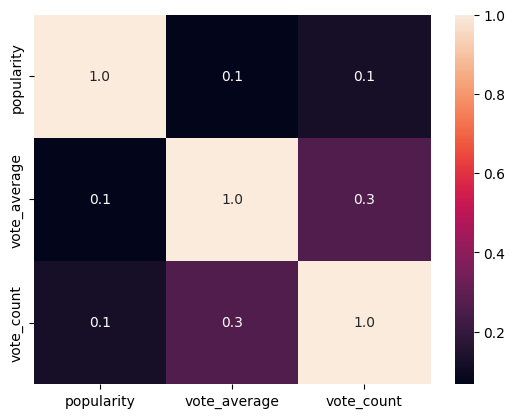

In [9]:
sns.heatmap(df1.corr(),annot=True, fmt="1.1f")

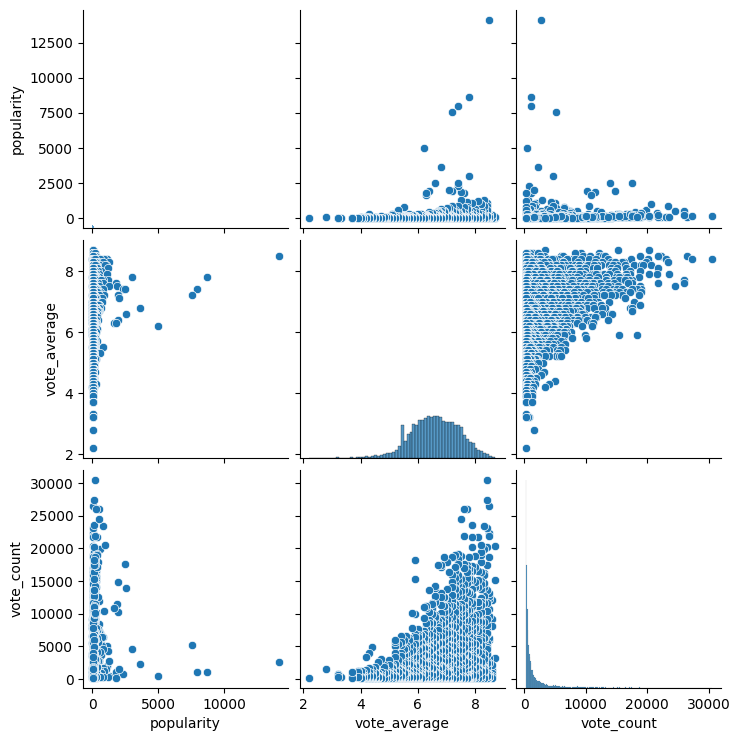

In [10]:
sns.pairplot(df1)

<Axes: xlabel='year'>

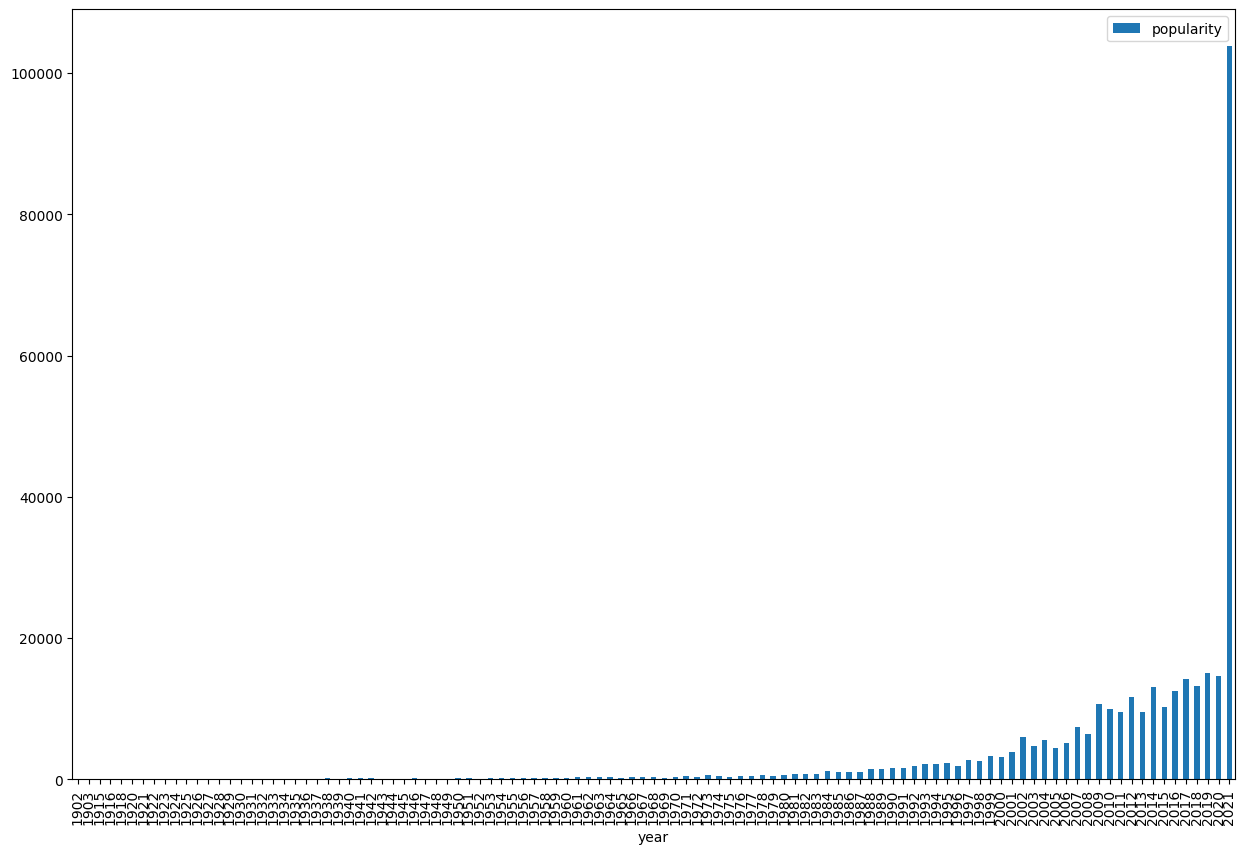

In [11]:
df_year=pd.DataFrame(df.groupby('year')['popularity'].sum())
df_year.plot.bar(figsize=(15,10))

In [12]:
df_100.head(10)

,Unnamed: 0,id,title,release_date,overview,popularity,vote_average,vote_count,video,year,month
23,23,634649,Spider-Man: No Way Home,2021-12-15,Peter Parker is unmasked and no longer able to...,14136.690,8.5,2654,False,2021,12
691,691,568124,Encanto,2021-11-24,"The tale of an extraordinary family, the Madri...",8663.277,7.8,1065,False,2021,11
1748,1748,624860,The Matrix Resurrections,2021-12-16,"Plagued by strange memories, Neo's life takes ...",7976.130,7.4,1029,False,2021,12
2371,2371,580489,Venom: Let There Be Carnage,2021-09-30,After finding a host body in investigative rep...,7537.265,7.2,5184,False,2021,9
6333,6333,460458,Resident Evil: Welcome to Raccoon City,2021-11-24,Once the booming home of pharmaceutical giant ...,4973.769,6.2,456,False,2021,11
3796,3796,512195,Red Notice,2021-11-04,An Interpol-issued Red Notice is a global aler...,3644.595,6.8,2294,False,2021,11
587,587,566525,Shang-Chi and the Legend of the Ten Rings,2021-09-01,Shang-Chi must confront the past he thought he...,2967.672,7.8,4608,False,2021,9
4674,4674,1930,The Amazing Spider-Man,2012-06-23,Peter Parker is an outcast high schooler aband...,2514.446,6.6,13992,False,2012,6
1715,1715,315635,Spider-Man: Homecoming,2017-07-05,Following the events of Captain America: Civil...,2474.781,7.4,17559,False,2017,7
1581,1581,585245,Clifford the Big Red Dog,2021-11-10,As Emily struggles to fit in at home and at sc...,2311.807,7.4,712,False,2021,11


<Axes: ylabel='title'>

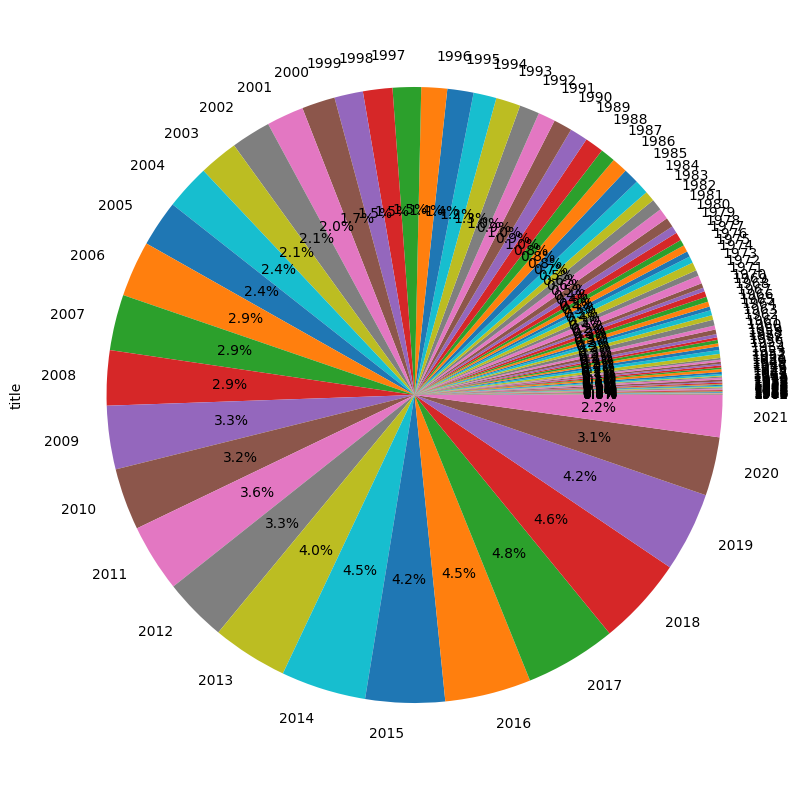

In [13]:
df.groupby('year')['title'].count().plot.pie(figsize=(10,10),autopct="%1.1f%%")

<Axes: ylabel='title'>

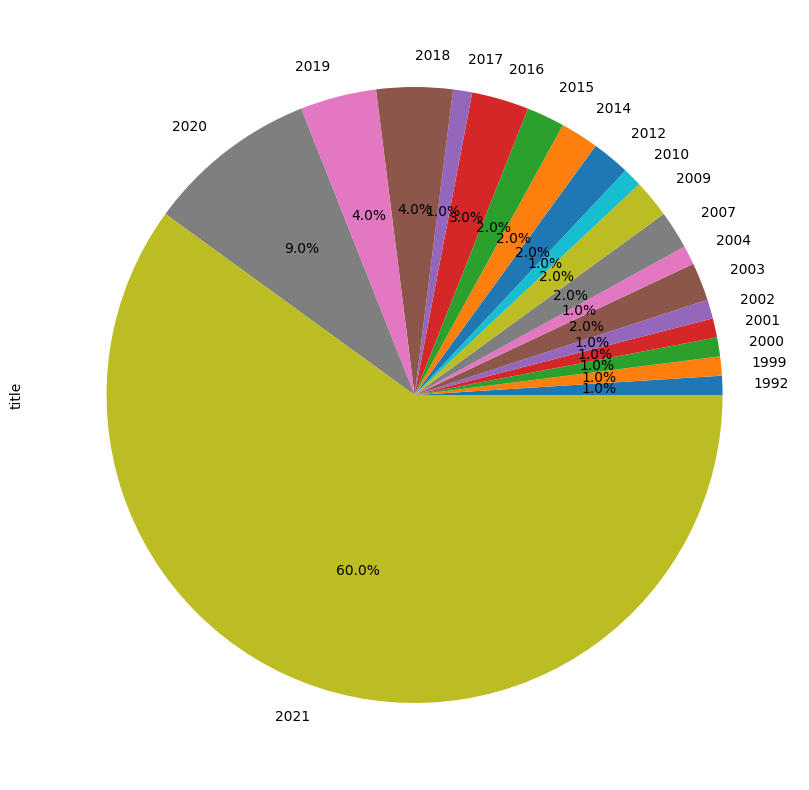

In [14]:
df_100.groupby('year')['title'].count().plot.pie(figsize=(10,10),autopct="%1.1f%%")

<Axes: ylabel='popularity'>

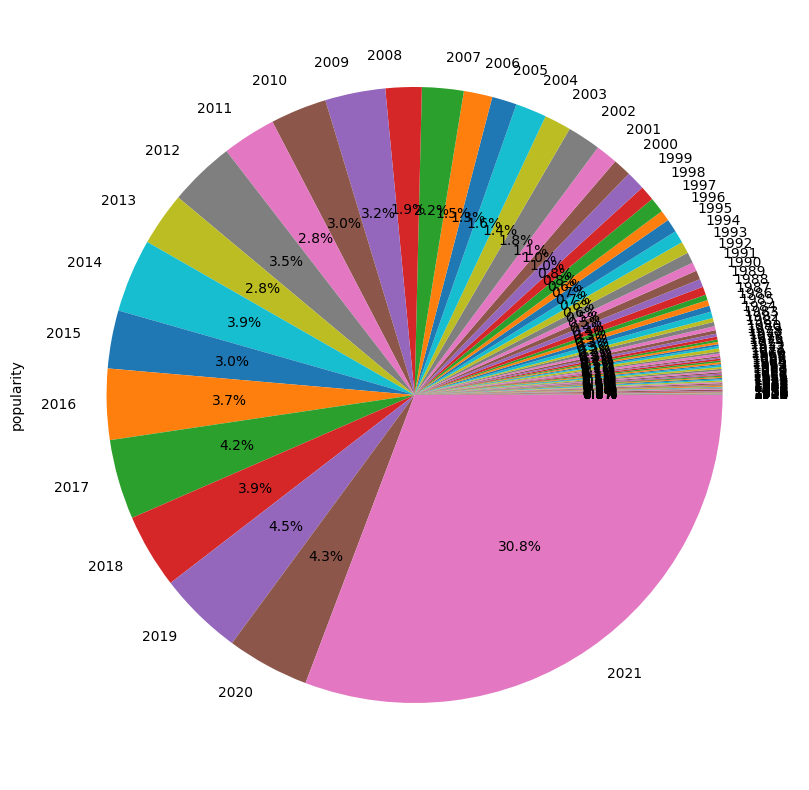

In [15]:
df.groupby('year')['popularity'].sum().plot.pie(figsize=(10,10),autopct="%1.1f%%")

<Axes: ylabel='popularity'>

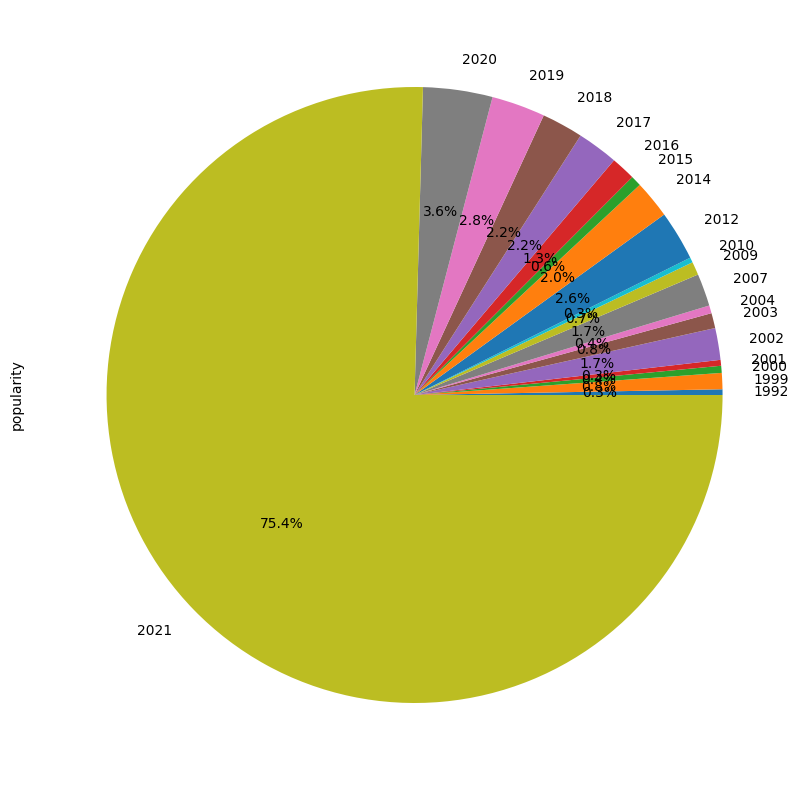

In [16]:
df_100.groupby('year')['popularity'].sum().plot.pie(figsize=(10,10),autopct="%1.1f%%")

**Word Clouds**

In [17]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation
import string
import nltk
nltk.download('stopwords')
list_stopwords = set(stopwords.words('english'))

from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [18]:
df_nlp=df_100.copy()

In [19]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [20]:
df_nlp['title2'] = df_nlp['title'].str.lower()
df_nlp['title2'] = df_nlp['title2'].apply(word_tokenize)
df_nlp['title2'] = df_nlp['title2'].apply(lambda x: [word for word in x if word not in list_stopwords])
df_nlp['title2'] = df_nlp['title2'].apply(lambda x : [word.translate(str.maketrans('', '', string.punctuation)) for word in x])
df_nlp['title2'] = df_nlp['title2'].apply(lambda x : [word for word in x if len(word) > 1])

In [21]:
df_nlp['overview2'] = df_nlp['overview'].str.lower()
df_nlp['overview2'] = df_nlp['overview2'].apply(word_tokenize)
df_nlp['overview2'] = df_nlp['overview2'].apply(lambda x: [word for word in x if word not in list_stopwords])
df_nlp['overview2'] = df_nlp['overview2'].apply(lambda x : [word.translate(str.maketrans('', '', string.punctuation)) for word in x])
df_nlp['overview2'] = df_nlp['overview2'].apply(lambda x : [word for word in x if len(word) > 1])

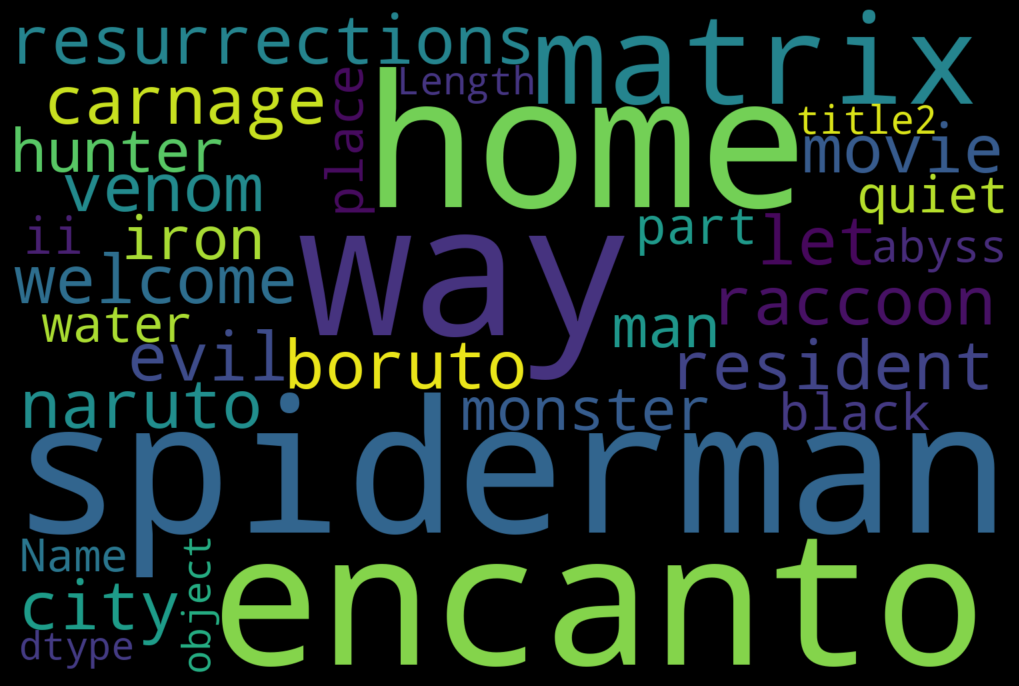

In [22]:
text1 = df_nlp['title2']
wordcloud = WordCloud(
    width = 1500,
    height = 1000,
    background_color = 'black',
    stopwords = list_stopwords).generate(str(text1))
fig = plt.figure(
    figsize = (10, 8),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

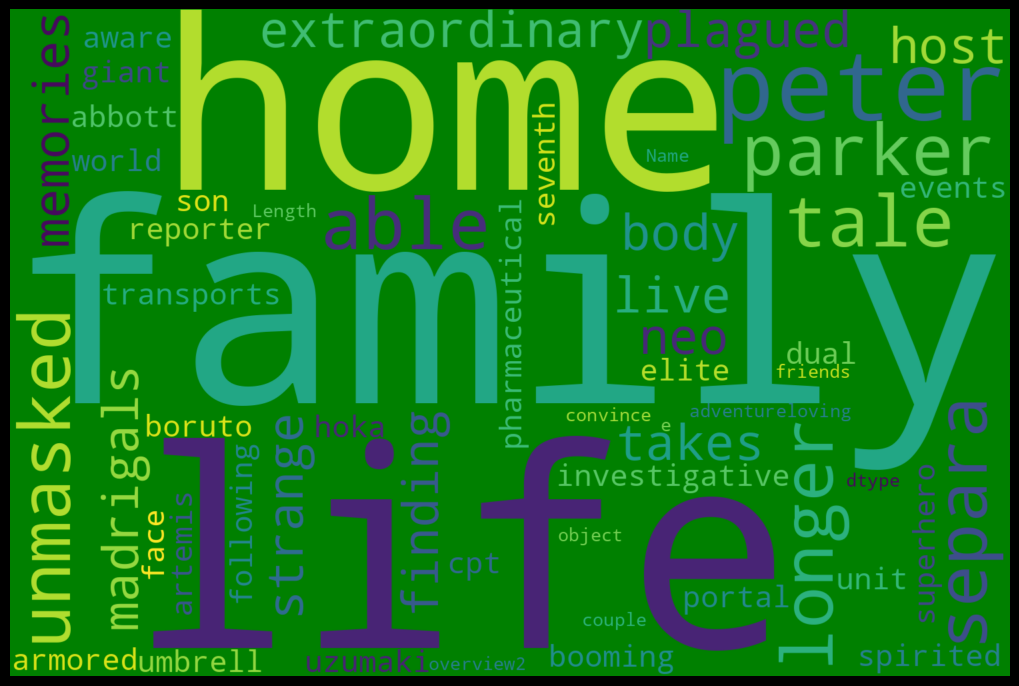

In [23]:
text2 = df_nlp['overview2']
wordcloud = WordCloud(
    width = 1500,
    height = 1000,
    background_color = 'green',
    stopwords = list_stopwords).generate(str(text2))
fig = plt.figure(
    figsize = (10, 8),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

**Modeling**

In [24]:
pip install pycaret --ignore-installed llvmlite numba

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.4/484.4 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 MB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 109.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 798.7/798.7 kB 49.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 18.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 110.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 123.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.1/133.1 kB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.3/36.3 MB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 32.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 91.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━

In [25]:
from pycaret.clustering import *

In [31]:
clu = setup(data=df1, session_id=1)

,Description,Value
0,Session id,1
1,Original data shape,"(9463, 4)"
2,Transformed data shape,"(9463, 9153)"
3,Numeric features,3
4,Categorical features,1
5,Preprocess,True
6,Imputation type,simple
7,Numeric imputation,mean
8,Categorical imputation,mode
9,Maximum one-hot encoding,-1


In [32]:
kmeans = create_model('kmeans',num_clusters=4)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.7493,28261.3676,0.5047,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

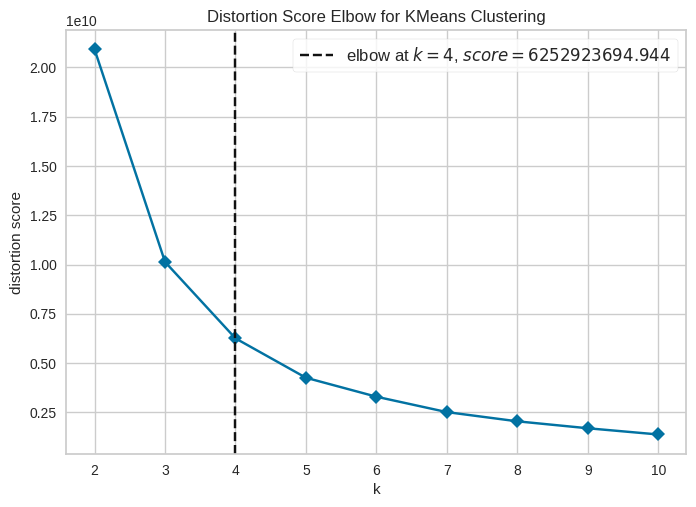

In [33]:
plot_model(kmeans, 'elbow')

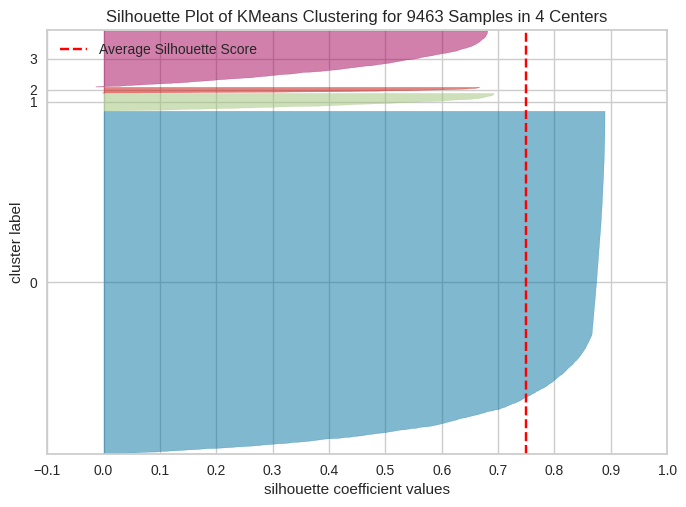

In [34]:
plot_model(kmeans, plot = 'silhouette')

In [35]:
kmeans_df = assign_model(kmeans)
kmeans_df.head(5)

,title,popularity,vote_average,vote_count,Cluster
0,Dilwale Dulhania Le Jayenge,25.884001,8.7,3304,Cluster 3
1,The Shawshank Redemption,60.110001,8.7,20369,Cluster 2
2,The Godfather,62.784000,8.7,15219,Cluster 2
3,Gabriel's Inferno Part II,28.316000,8.6,1360,Cluster 0
4,Schindler's List,38.660999,8.6,12158,Cluster 1


In [36]:
plot_model(kmeans)

In [37]:
plot_model(kmeans,'distribution')

In [38]:
kmeans_df.groupby('Cluster').describe().T

Cluster               Cluster 0     Cluster 1     Cluster 2     Cluster 3
popularity   count  7692.000000    392.000000    126.000000   1253.000000
             mean     24.470451     91.922096    200.175735     70.343422
             std     159.392319    180.772125    360.843292    476.508728
             min       0.600000      1.502000      9.833000      0.600000
             25%       8.376500     30.851000     67.370253     18.230000
             50%      10.961000     50.279499    111.079498     29.059000
             75%      17.233250     93.326498    174.910503     49.577999
             max    8663.277344   1958.483032   2514.446045  14136.690430
vote_average count  7692.000000    392.000000    126.000000   1253.000000
             mean      6.514405      7.221174      7.668254      6.799760
             std       0.816282      0.672884      0.563227      0.698258
             min       2.200000      5.200000      5.900000      4.200000
             25%       6.000000      6.800000      7.300000      6.300000
             50%       6.500000      7.300000      7.700000      6.800000
             75%       7.100000      7.700000      8.100000      7.300000
             max       8.600000      8.600000      8.700000      8.700000
vote_count   count  7692.000000    392.000000    126.000000   1253.000000
             mean    624.316563   8183.704082  16441.579365   3395.648045
             std     439.294975   1802.522834   3601.141404   1045.508994
             min     200.000000   5800.000000  12331.000000   2011.000000
             25%     287.000000   6595.750000  13778.750000   2512.000000
             50%     451.000000   7890.500000  15458.500000   3135.000000
             75%     843.250000   9490.000000  17967.500000   4183.000000
             max    2008.000000  12193.000000  30535.000000   5781.000000

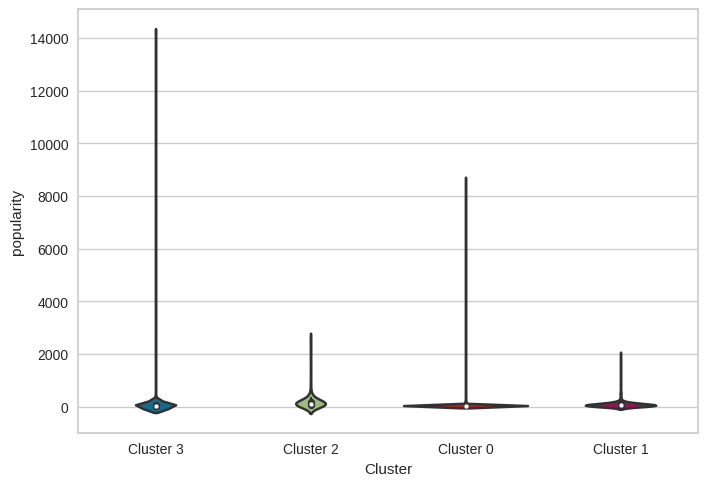

In [39]:
sns.violinplot(x='Cluster', y='popularity', data=kmeans_df)
plt.show()

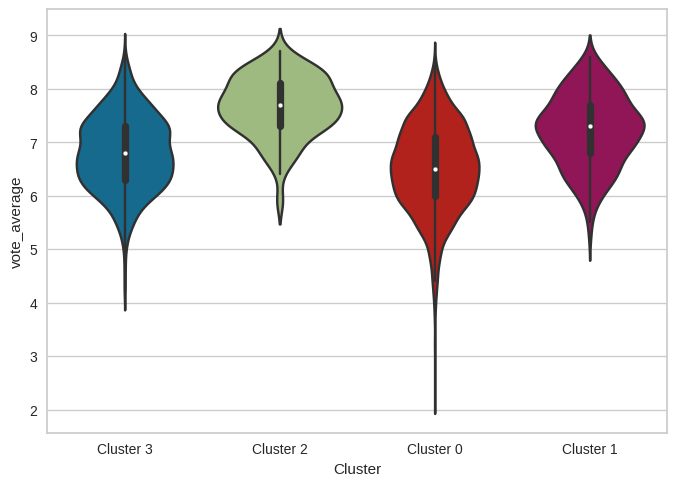

In [40]:
sns.violinplot(x='Cluster', y='vote_average', data=kmeans_df)
plt.show()

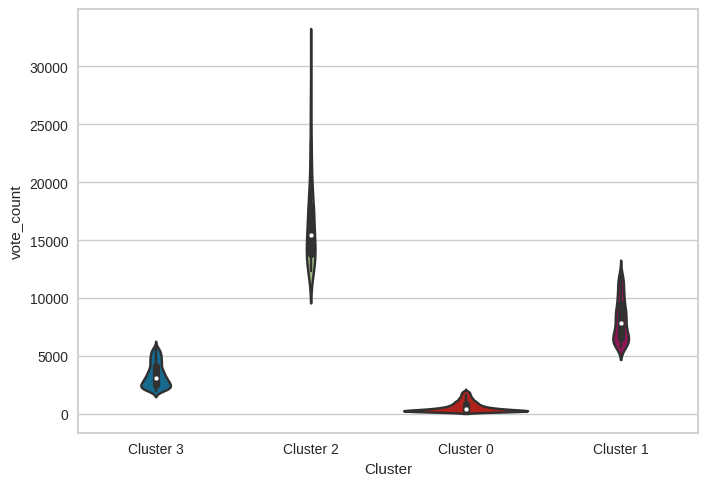

In [41]:
sns.violinplot(x='Cluster', y='vote_count', data=kmeans_df)
plt.show()

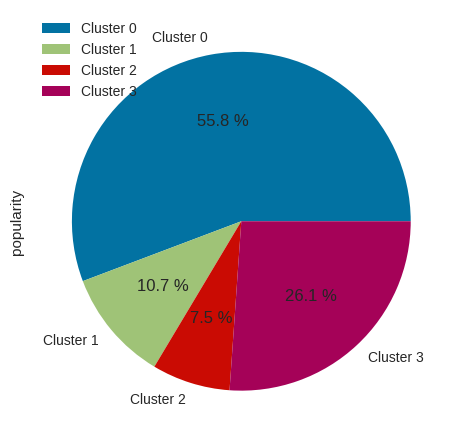

In [42]:
kmeans_df.groupby('Cluster').sum().plot.pie(y='popularity',autopct="%1.1f %%")
plt.legend(loc="upper left")

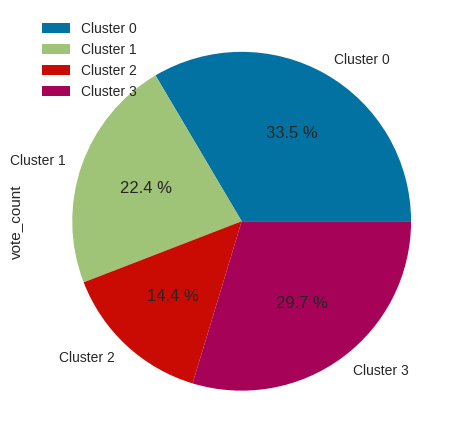

In [43]:
kmeans_df.groupby('Cluster').sum().plot.pie(y='vote_count',autopct="%1.1f %%")
plt.legend(loc="upper left")

<Axes: xlabel='Cluster'>

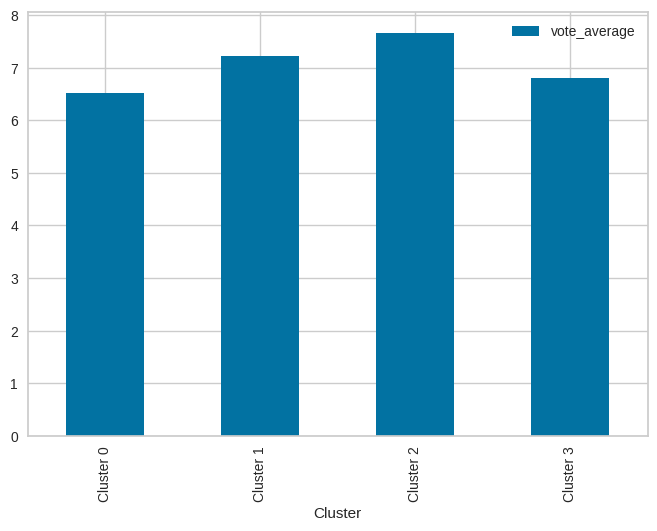

In [44]:
kmeans_df.groupby('Cluster').mean().plot.bar(y='vote_average')

In [45]:
df['Cluster']=kmeans_df['Cluster']

In [46]:
df_100_cluster=df.sort_values('popularity',ascending=False).head(100)
df_100_cluster.head()

,Unnamed: 0,id,title,release_date,overview,popularity,vote_average,vote_count,video,year,month,Cluster
23,23,634649,Spider-Man: No Way Home,2021-12-15,Peter Parker is unmasked and no longer able to...,14136.690,8.5,2654,False,2021,12,Cluster 3
691,691,568124,Encanto,2021-11-24,"The tale of an extraordinary family, the Madri...",8663.277,7.8,1065,False,2021,11,Cluster 0
1748,1748,624860,The Matrix Resurrections,2021-12-16,"Plagued by strange memories, Neo's life takes ...",7976.130,7.4,1029,False,2021,12,Cluster 0
2371,2371,580489,Venom: Let There Be Carnage,2021-09-30,After finding a host body in investigative rep...,7537.265,7.2,5184,False,2021,9,Cluster 3
6333,6333,460458,Resident Evil: Welcome to Raccoon City,2021-11-24,Once the booming home of pharmaceutical giant ...,4973.769,6.2,456,False,2021,11,Cluster 0


<Axes: xlabel='popularity', ylabel='vote_average'>

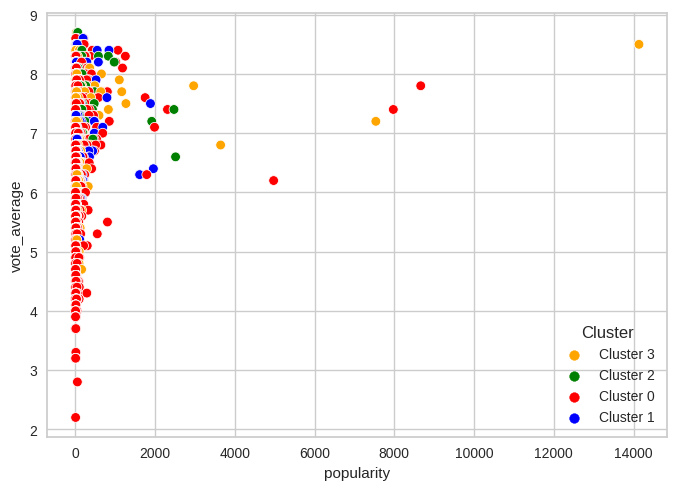

In [47]:
sns.scatterplot(data=df,x='popularity', y='vote_average',hue='Cluster',palette={'Cluster 0': 'red',
                      'Cluster 1': 'blue',
                      'Cluster 2': 'green',
                      'Cluster 3': 'orange'})

<Axes: xlabel='popularity', ylabel='vote_count'>

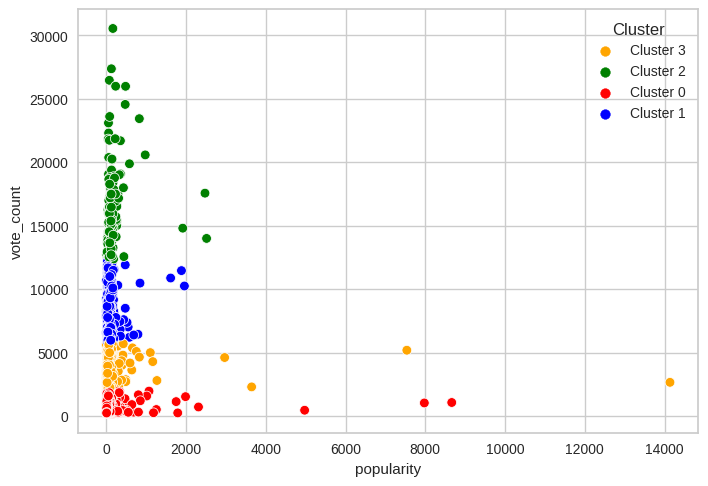

In [48]:
sns.scatterplot(data=df,x='popularity', y='vote_count',hue='Cluster',palette={'Cluster 0': 'red',
                      'Cluster 1': 'blue',
                      'Cluster 2': 'green',
                      'Cluster 3': 'orange'})

<Axes: xlabel='vote_average', ylabel='vote_count'>

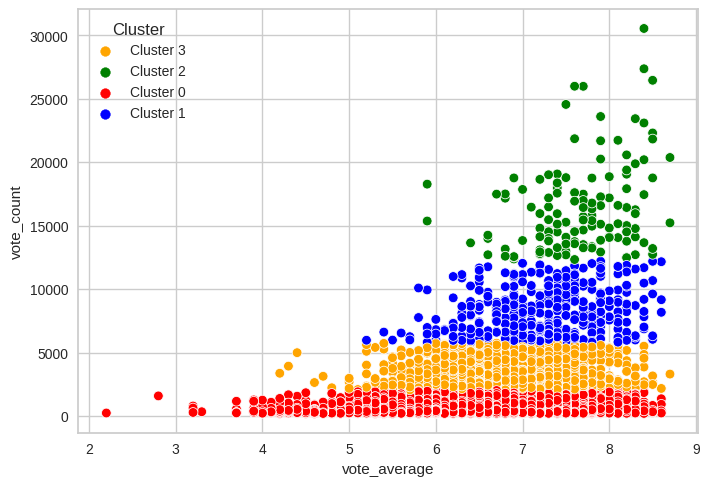

In [49]:
sns.scatterplot(data=df,x='vote_average', y='vote_count',hue='Cluster',palette={'Cluster 0': 'red',
                      'Cluster 1': 'blue',
                      'Cluster 2': 'green',
                      'Cluster 3': 'orange'})

<Axes: xlabel='year,Cluster'>

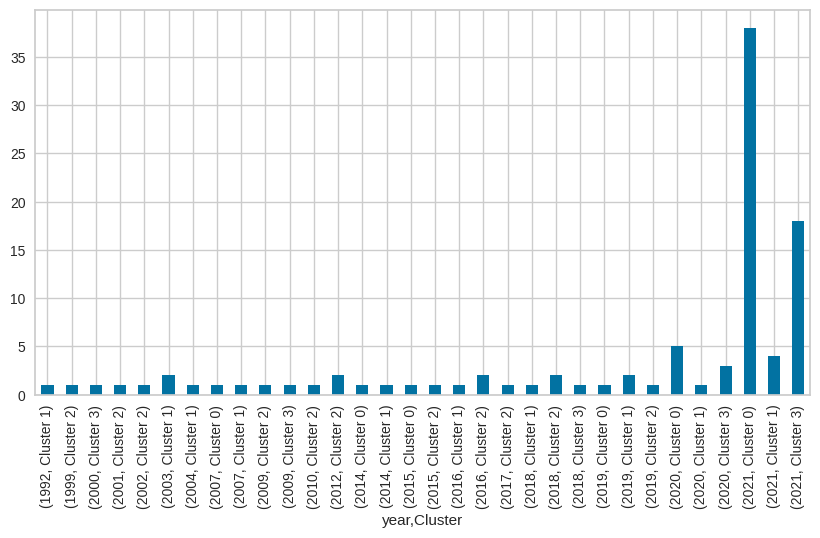

In [50]:
df_100_cluster.groupby(['year','Cluster'])['title'].count().plot.bar(figsize=(10,5))